In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

## Analysis of full dataset and data preprocessing

In [2]:
# Get the absolute path of the current notebook
notebook_path = os.path.abspath('')

# Navigate to the project root (CS182-Final-Project)
project_root = os.path.dirname(notebook_path)
os.chdir(project_root)

# Now you can load the data using relative path from project root
print("Loading full dataset...")
full_data = pd.read_pickle('./data/benchmarkingGS_v1-0_similarityMeasure_sequence_v3-1.pkl')
display(full_data)


# Keep only the required columns
columns_to_keep = ['uniprotID_A', 'uniprotID_B', 'isInteraction', 'trainTest', 'sequence_A', 'sequence_B']
data = full_data[columns_to_keep]
display(data)

# Calculate dataset statistics
print("\n--- Full Dataset Statistics ---")

Loading full dataset...


,uniprotID_A,uniprotID_B,isInteraction,trainTest,RNAseqHPA,tissueHPA,tissueCellHPA,subcellularLocationHPA,bioProcessUniprot,cellCompUniprot,molFuncUniprot,domainUniprot,motifUniprot,Bgee,sequence_A,sequence_B
0,P28223,P41595,1,test2,0.160188,-0.449930,-0.060381,NaN,0.400892,0.404061,0.680414,0.0,0.790569,0.422078,MDILCEENTSLSSTTNSLMQLNDDTRLYSNDFNSGEANTSDAFNWT...,MALSYRVSELQSTIPEHILQSTFVHVISSNWSGLQTESIPEEMKQI...
1,O00161,P56962,1,train,0.825131,0.851690,0.675880,0.000000,0.190693,0.200000,0.353553,0.0,0.000000,0.922975,MDNLSSEEIQQRAHQITDESLESTRRILGLAIESQDAGIKTITMLD...,MSEDEEKVKLRRLEPAIQKFIKIVIPTDLERLRKHQINIEKYQRCR...
2,P82979,Q01081,1,train,0.930790,0.954869,0.911887,0.000000,0.547723,0.365148,0.408248,0.0,0.000000,NaN,MATETVELHKLKLAELKQECLARGLETKGIKQDLIHRLQAYLEEHA...,MAEYLASIFGTEKDKVNCSFYFKIGACRHGDRCSRLHNKPTFSQTI...
3,O60678,Q14524,1,train,0.219384,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,NaN,MCSLASGATGGRGAVENEEDLPELSDSGDEAAWEDEDDADLPHGKQ...,MANFLLPRGTSSFRRFTRESLAAIEKRMAEKQARGSTTLQESREGL...
4,P10275,Q15648,1,train,0.500558,-0.311704,-0.371061,0.000000,0.169811,0.375000,0.157895,0.0,0.000000,NaN,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,MKAQGETEESEKLSKMSSLLERLHAKFNQNRPWSETIKLVRQVMEK...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268494,O95678,Q8IYX3,0,test2,0.022646,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,NaN,MSRQSSITFQSGSRRGFSTTSAITPAAGRSRFSSVSVARSAAGSGG...,MARCRHHSGYLADDEASHSMCSARVQLPKKPLVPEMRPACKPGRVP...
268495,O95835,Q8WUJ0,0,test2,0.854290,NaN,NaN,NaN,0.000000,0.447214,0.000000,0.0,0.000000,0.930655,MKRSEKPEGYRQMRPKTFPASNYTVSSRQMLQEIRESLRNLSKPSD...,MEDVKLEFPSLPQCKEDAEEWTYPMRREMQEILPGLFLGPYSSAMK...
268496,P60409,Q9NUB4,0,test2,0.894159,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,NaN,MAASTMSVCSSDLSYGSRVCLPGSCDSCSDSWQVDDCPESCCEPPC...,MTRLCLPRPEAREDPIPVPPRGLGAGEGSGSPVRPPVSTWGPSWAQ...
268497,O43294,Q6ZRT6,0,test2,0.062636,NaN,NaN,0.288675,0.000000,0.000000,0.000000,0.0,0.000000,-0.606365,MEDLDALLSDLETTTSHMPRSGAPKERPAEPLTPPPSYGHQPQTGS...,MVSRPRSPSAFPAPWWGQQPGGPGPAKRLRLEEPAGPEPRAAPSLE...


,uniprotID_A,uniprotID_B,isInteraction,trainTest,sequence_A,sequence_B
0,P28223,P41595,1,test2,MDILCEENTSLSSTTNSLMQLNDDTRLYSNDFNSGEANTSDAFNWT...,MALSYRVSELQSTIPEHILQSTFVHVISSNWSGLQTESIPEEMKQI...
1,O00161,P56962,1,train,MDNLSSEEIQQRAHQITDESLESTRRILGLAIESQDAGIKTITMLD...,MSEDEEKVKLRRLEPAIQKFIKIVIPTDLERLRKHQINIEKYQRCR...
2,P82979,Q01081,1,train,MATETVELHKLKLAELKQECLARGLETKGIKQDLIHRLQAYLEEHA...,MAEYLASIFGTEKDKVNCSFYFKIGACRHGDRCSRLHNKPTFSQTI...
3,O60678,Q14524,1,train,MCSLASGATGGRGAVENEEDLPELSDSGDEAAWEDEDDADLPHGKQ...,MANFLLPRGTSSFRRFTRESLAAIEKRMAEKQARGSTTLQESREGL...
4,P10275,Q15648,1,train,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,MKAQGETEESEKLSKMSSLLERLHAKFNQNRPWSETIKLVRQVMEK...
...,...,...,...,...,...,...
268494,O95678,Q8IYX3,0,test2,MSRQSSITFQSGSRRGFSTTSAITPAAGRSRFSSVSVARSAAGSGG...,MARCRHHSGYLADDEASHSMCSARVQLPKKPLVPEMRPACKPGRVP...
268495,O95835,Q8WUJ0,0,test2,MKRSEKPEGYRQMRPKTFPASNYTVSSRQMLQEIRESLRNLSKPSD...,MEDVKLEFPSLPQCKEDAEEWTYPMRREMQEILPGLFLGPYSSAMK...
268496,P60409,Q9NUB4,0,test2,MAASTMSVCSSDLSYGSRVCLPGSCDSCSDSWQVDDCPESCCEPPC...,MTRLCLPRPEAREDPIPVPPRGLGAGEGSGSPVRPPVSTWGPSWAQ...
268497,O43294,Q6ZRT6,0,test2,MEDLDALLSDLETTTSHMPRSGAPKERPAEPLTPPPSYGHQPQTGS...,MVSRPRSPSAFPAPWWGQQPGGPGPAKRLRLEEPAGPEPRAAPSLE...



--- Full Dataset Statistics ---


In [3]:
# Training set stats
train_data = data[data['trainTest'] == 'train']
train_pos = train_data[train_data['isInteraction'] == 1]
train_neg = train_data[train_data['isInteraction'] == 0]
print(f"Train set: {train_data.shape[0]} examples")
print(f"  Positive: {train_pos.shape[0]} ({train_pos.shape[0]/train_data.shape[0]*100:.2f}%)")
print(f"  Negative: {train_neg.shape[0]} ({train_neg.shape[0]/train_data.shape[0]*100:.2f}%)")

# Test1 set stats
test1_data = data[data['trainTest'] == 'test1']
test1_pos = test1_data[test1_data['isInteraction'] == 1]
test1_neg = test1_data[test1_data['isInteraction'] == 0]
print(f"\nTest1 set: {test1_data.shape[0]} examples")
print(f"  Positive: {test1_pos.shape[0]} ({test1_pos.shape[0]/test1_data.shape[0]*100:.2f}%)")
print(f"  Negative: {test1_neg.shape[0]} ({test1_neg.shape[0]/test1_data.shape[0]*100:.2f}%)")

# Test2 set stats
test2_data = data[data['trainTest'] == 'test2']
test2_pos = test2_data[test2_data['isInteraction'] == 1]
test2_neg = test2_data[test2_data['isInteraction'] == 0]
print(f"\nTest2 set: {test2_data.shape[0]} examples")
print(f"  Positive: {test2_pos.shape[0]} ({test2_pos.shape[0]/test2_data.shape[0]*100:.2f}%)")
print(f"  Negative: {test2_neg.shape[0]} ({test2_neg.shape[0]/test2_data.shape[0]*100:.2f}%)")

# Create validation set from training data (20% of training)
print("\n--- Creating Validation Set ---")
# Split the training data into train and validation
train_data_new, val_data = train_test_split(
    train_data, 
    test_size=0.2, 
    random_state=42, 
    stratify=train_data['isInteraction']  # Maintain the same pos/neg ratio
)

# Update the trainTest field
val_data = val_data.copy()
val_data['trainTest'] = 'validation'

print(f"New train set: {train_data_new.shape[0]} examples")
print(f"  Positive: {train_data_new[train_data_new['isInteraction'] == 1].shape[0]} "
      f"({train_data_new[train_data_new['isInteraction'] == 1].shape[0]/train_data_new.shape[0]*100:.2f}%)")

print(f"Validation set: {val_data.shape[0]} examples")
print(f"  Positive: {val_data[val_data['isInteraction'] == 1].shape[0]} "
      f"({val_data[val_data['isInteraction'] == 1].shape[0]/val_data.shape[0]*100:.2f}%)")

# Save datasets to full_dataset directory
output_dir = './data/full_dataset'
os.makedirs(output_dir, exist_ok=True)

print("\nSaving datasets...")
train_data_new.to_pickle(f'{output_dir}/train_data.pkl')
val_data.to_pickle(f'{output_dir}/validation_data.pkl')
test1_data.to_pickle(f'{output_dir}/test1_data.pkl')
test2_data.to_pickle(f'{output_dir}/test2_data.pkl')

print(f"All datasets successfully saved to '{output_dir}' directory") 

Train set: 106662 examples
  Positive: 53331 (50.00%)
  Negative: 53331 (50.00%)

Test1 set: 24898 examples
  Positive: 12449 (50.00%)
  Negative: 12449 (50.00%)

Test2 set: 136939 examples
  Positive: 12449 (9.09%)
  Negative: 124490 (90.91%)

--- Creating Validation Set ---
New train set: 85329 examples
  Positive: 42665 (50.00%)
Validation set: 21333 examples
  Positive: 10666 (50.00%)

Saving datasets...
All datasets successfully saved to './data/full_dataset' directory


## Encode proteins using ESM C model

In [7]:
from getpass import getpass

token = getpass("Token from Forge console: ")

In [8]:
# Load ESM model with fallback mechanisms
from esm.models.esmc import ESMC
from esm.sdk import client
from esm.sdk.api import ESMProtein, LogitsConfig
import torch
import os

print("Attempting to load ESM C model...")

# Try both local and remote loading with fallback
try:
    # First try local loading
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = ESMC.from_pretrained("esmc_300m").to(device)
    print(f"Model loaded locally on {device}")
    
    # Define embedding function for local model
    def get_protein_embedding(sequence, max_retries=3):
        for attempt in range(max_retries):
            try:
                with torch.no_grad():
                    protein = ESMProtein(sequence=sequence)
                    protein_tensor = model.encode(protein)
                    logits_output = model.logits(
                        protein_tensor, 
                        LogitsConfig(sequence=True, return_embeddings=True)
                    )
                    embedding = logits_output.embeddings.mean(dim=0)
                    return embedding.cpu().numpy()
            except Exception as e:
                print(f"Attempt {attempt+1}/{max_retries} failed: {e}")
                if attempt == max_retries - 1:
                    raise
                import time
                time.sleep(2 ** attempt)
    
    model_type = "local"
    
except Exception as e:
    print(f"Local loading failed: {e}")
    print("Trying remote API client instead...")
    
    # Fallback to remote API
    try:
        # You need to set your API token
        token = os.environ.get("ESM_API_TOKEN")  # Get from environment variable
        if not token:
            # If you don't have a token in env vars, you can set it directly here
            # token = "your_token_here"  # Not recommended for shared code
            token = input("Please enter your ESM API token: ")
            
        model = client(
            model="esmc-300m-2024-12", 
            url="https://forge.evolutionaryscale.ai", 
            token=token
        )
        print(f"Model loaded via remote API")
        
        # Define embedding function for remote model
        def get_protein_embedding(sequence, max_retries=3):
            for attempt in range(max_retries):
                try:
                    # Remote API has slightly different usage
                    result = model.embed(sequence)
                    # Extract the embedding (may need adjustment based on API response)
                    embedding = result.mean(axis=0)  # Mean pooling across sequence length
                    return embedding
                except Exception as e:
                    print(f"Remote API attempt {attempt+1}/{max_retries} failed: {e}")
                    if attempt == max_retries - 1:
                        raise
                    import time
                    time.sleep(2 ** attempt)
        
        model_type = "remote"
        
    except Exception as e:
        print(f"Remote API loading also failed: {e}")
        raise RuntimeError("Failed to load ESM model through any available method")

print(f"Successfully initialized {model_type} ESM model")

Attempting to load ESM C model...


Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 27103.74it/s]


Model loaded locally on cuda
Successfully initialized local ESM model


In [9]:
def get_protein_embedding(sequence):
    """Get protein embedding for a given sequence"""
    protein = ESMProtein(sequence=sequence)
    protein_tensor = model.encode(protein)
    logits_output = model.logits(
        protein_tensor, 
        LogitsConfig(sequence=True, return_embeddings=True)
    )
    # Get the per-protein representation by mean-pooling across sequence length
    embedding = logits_output.embeddings.mean(dim=0)
    return embedding.cpu().numpy()

def process_dataset(df, sample_size=None):
    """Process dataset to add embeddings for both protein sequences
    
    Args:
        df: DataFrame with protein sequences
        sample_size: Optional, number of examples to process (for testing)
    """
    # Create a copy of the dataframe to avoid modifying the original
    if sample_size is not None and sample_size < len(df):
        result_df = df.sample(sample_size, random_state=42).copy()
    else:
        result_df = df.copy()
    
    # Process each protein pair
    embeddings_A = []
    embeddings_B = []
    
    for i, row in tqdm(result_df.iterrows(), total=len(result_df), desc="Encoding proteins"):
        # Get embeddings for protein A and B
        embedding_A = get_protein_embedding(row['sequence_A'])
        embedding_B = get_protein_embedding(row['sequence_B'])
        
        embeddings_A.append(embedding_A)
        embeddings_B.append(embedding_B)
    
    # Store the embeddings
    result_df['embedding_A'] = embeddings_A
    result_df['embedding_B'] = embeddings_B
    
    return result_df

## Process a small sample for testing

Let's process a small sample first to test the embedding generation and analyze the embedding dimensions.

Processing a small sample...


Encoding proteins: 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

Type of embedding: <class 'numpy.ndarray'>
Shape of embedding: (853, 960)
  - First dimension (853): Number of residues/amino acids in the protein
  - Second dimension (960): Per-residue embedding dimension from ESM C model

Protein-level embedding shape (after averaging): (960,)


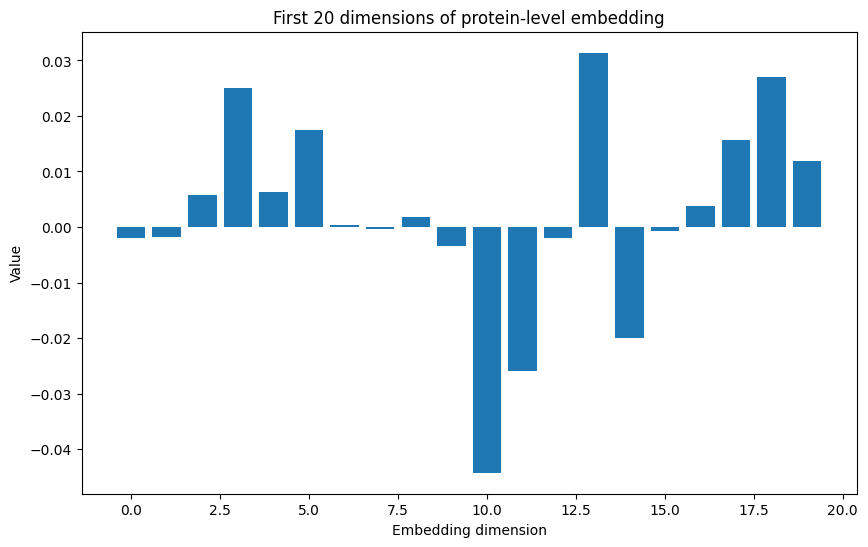

In [10]:
train_data = pd.read_pickle('./data/full_dataset/train_data.csv')
test1_data = pd.read_pickle('./data/full_dataset/test1_data.csv')
test2_data = pd.read_pickle('./data/full_dataset/test2_data.csv')
val_data = pd.read_pickle('./data/full_dataset/validation_data.csv')

# Process a small sample from the training set to test
print("Processing a small sample...")
sample_with_embeddings = process_dataset(train_data, sample_size=5)

# Display the sample with embeddings
sample_with_embeddings.head()

# Get an example embedding
emb_A = sample_with_embeddings['embedding_A'].iloc[0]

# Print embedding information
print(f"Type of embedding: {type(emb_A)}")
print(f"Shape of embedding: {emb_A.shape}")
print(f"  - First dimension ({emb_A.shape[0]}): Number of residues/amino acids in the protein")
print(f"  - Second dimension ({emb_A.shape[1]}): Per-residue embedding dimension from ESM C model")

# Calculate protein-level embedding by averaging across residues
protein_level_embedding = np.mean(emb_A, axis=0)
print(f"\nProtein-level embedding shape (after averaging): {protein_level_embedding.shape}")

# Visualize part of the protein-level embedding
plt.figure(figsize=(10, 6))
plt.bar(range(20), protein_level_embedding[:20])
plt.title('First 20 dimensions of protein-level embedding')
plt.xlabel('Embedding dimension')
plt.ylabel('Value')
plt.show()

## Process the full datasets

Now let's process the complete datasets. 
Warning: This can take a long time depending on dataset size and available hardware.

In [17]:
def get_protein_embedding(sequence):
    """Get protein embedding for a given sequence"""
    with torch.no_grad():  # Prevent computation graph building
        protein = ESMProtein(sequence=sequence)
        protein_tensor = model.encode(protein)
        logits_output = model.logits(
            protein_tensor, 
            LogitsConfig(sequence=True, return_embeddings=True)
        )
        # Get the per-protein representation by mean-pooling across sequence length
        embedding = logits_output.embeddings.mean(dim=0)
    return embedding.cpu().numpy()

def process_dataset_dynamically(df, output_file, max_tokens=4000):
    """Process dataset with dynamic batching based on sequence length
    
    Args:
        df: DataFrame with protein sequences
        output_file: Path to save the processed dataset
        max_tokens: Maximum total tokens in a batch
    """
    # Check if output file exists to resume
    if os.path.exists(output_file):
        print(f"Resuming from existing file: {output_file}")
        try:
            result_df = pd.read_pickle(output_file)
            processed_ids = set(result_df.index)
            remaining_df = df.loc[~df.index.isin(processed_ids)]
            print(f"Already processed: {len(processed_ids)} examples")
            print(f"Remaining: {len(remaining_df)} examples")
        except Exception as e:
            print(f"Error loading previous file: {e}")
            print("Starting fresh")
            result_df = pd.DataFrame(columns=df.columns.tolist() + ['embedding_A', 'embedding_B'])
            remaining_df = df
    else:
        print(f"Starting new processing for {len(df)} examples")
        result_df = pd.DataFrame(columns=df.columns.tolist() + ['embedding_A', 'embedding_B'])
        remaining_df = df
    
    # Create batches based on sequence length
    print("Creating dynamic batches based on sequence length...")
    batches = []
    current_batch = []
    current_tokens = 0
    
    # Sort by sequence length to optimize batching (process similar lengths together)
    sorted_indices = remaining_df.apply(
        lambda x: len(x['sequence_A']) + len(x['sequence_B']), 
        axis=1
    ).sort_values().index
    
    for idx in sorted_indices:
        row = remaining_df.loc[idx]
        seq_len_a = len(row['sequence_A'])
        seq_len_b = len(row['sequence_B'])
        total_len = seq_len_a + seq_len_b
        
        # If adding this example exceeds the token limit, start a new batch
        if current_tokens + total_len > max_tokens and current_batch:
            batches.append(current_batch)
            current_batch = [idx]
            current_tokens = total_len
        else:
            current_batch.append(idx)
            current_tokens += total_len
    
    # Add the last batch if it's not empty
    if current_batch:
        batches.append(current_batch)
    
    print(f"Created {len(batches)} dynamic batches from {len(remaining_df)} examples")
    
    # Process each batch
    for batch_idx, batch in enumerate(batches):
        print(f"Processing batch {batch_idx+1}/{len(batches)} (size: {len(batch)} examples)")
        
        batch_results = []
        
        # Process each protein pair in the batch
        for i in tqdm(batch, desc="Encoding proteins"):
            try:
                row = remaining_df.loc[i]
                row_data = row.to_dict()
                
                with torch.no_grad():  # Prevent computation graph building
                    # Get embeddings for protein A and B
                    embedding_A = get_protein_embedding(row['sequence_A'])
                    embedding_B = get_protein_embedding(row['sequence_B'])
                
                row_data['embedding_A'] = embedding_A
                row_data['embedding_B'] = embedding_B
                batch_results.append((i, row_data))
                
                # Free memory explicitly
                if 'cuda' in str(device):
                    torch.cuda.empty_cache()
                
            except Exception as e:
                print(f"Error processing example {i}: {e}")
        
        # Create a batch dataframe with embeddings
        if batch_results:
            indices, data = zip(*batch_results)
            batch_df = pd.DataFrame(data, index=indices)
            
            # Append to result
            result_df = pd.concat([result_df, batch_df])
            
            # Save after each batch
            result_df.to_pickle(output_file)
            print(f"Saved {len(result_df)}/{len(df)} examples to {output_file}")
    
    return result_df